## **0. Dependencies**

### **0.1 Library Installation**

In [ ]:
#install library
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install plotly

### **0.2 Import Library dan Membaca Data**

In [41]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#baca data
data=pd.read_csv('spotify_songs_clean_parameter.csv')

## **4. Visualisasi Data**

### **H-Bar Chart 10 Musisi Dengan Lagu Terbanyak**

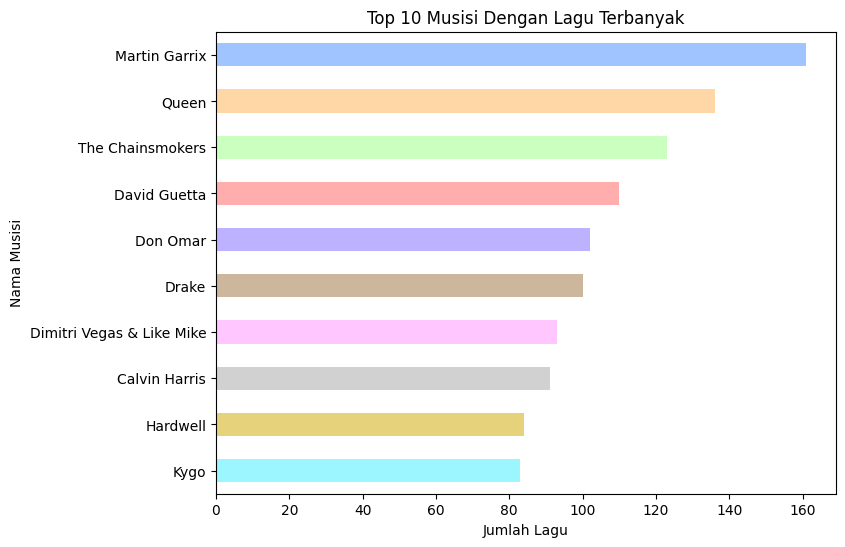

In [42]:
#sorting 10 musisi dengan lagu terbanyak
topartist=data['track_artist'].value_counts().head(10).sort_values(ascending=True)
#array hex code warna
warna=['#9bf6ff','#e7d27c','#d1d1d1','#ffc6ff','#ccb79c','#bdb2ff','#ffadad','#caffbf','#ffd6a5','#a0c4ff']
#visualisasi horizontal bar menggunakan matplotlib
plt.figure(figsize=(8,6))
topartist.plot(kind='barh',xlabel='Jumlah Lagu',ylabel='Nama Musisi',color=warna)
plt.title('Top 10 Musisi Dengan Lagu Terbanyak')
plt.show()

### **Diagram Pie Distribusi Genre Lagu**

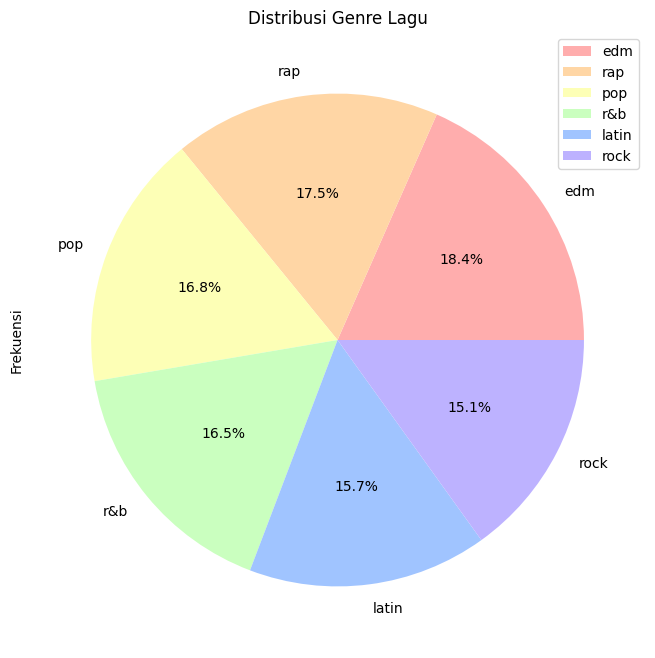

In [59]:
#menghitung jumlah lagu tiap genre
genre=data['playlist_genre'].value_counts()
#array hex code warna
warna2=['#ffadad','#ffd6a5','#fdffb6','#caffbf','#a0c4ff','#bdb2ff']
#visualisasi pie chart menggunakan matplotlib
plt.figure(figsize=[8,8])
genre.plot(kind='pie',title='Distribusi Genre Lagu',ylabel='Frekuensi',colors=warna2,autopct='%1.1f%%', legend=True)
plt.show()

### **Line Chart Perilisan Lagu Dari 2015-2019**

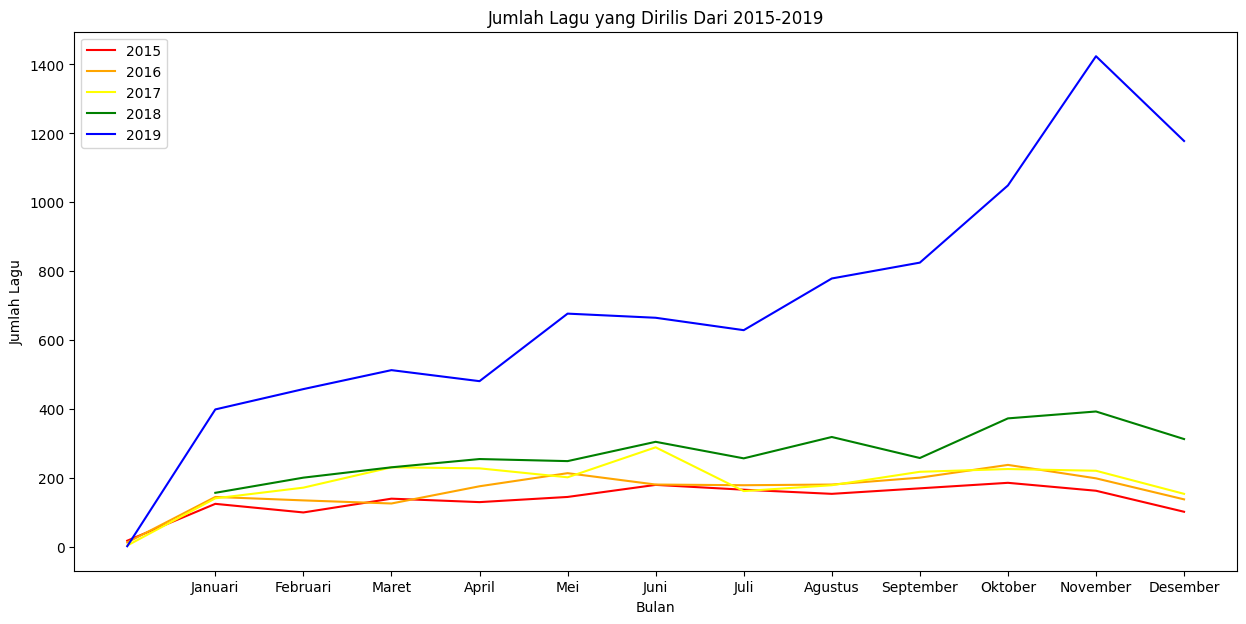

In [53]:
#array bulan
bulan=['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember']
#dictionary untuk menampung data setiap tahun
datax={}
#array tahun
tahun=['2015','2016','2017','2018','2019']
#looping untuk mengisi dictionary
for i in tahun:
    datax[i]=data[data["track_album_release_date"].str.contains(i)]["track_album_release_date"].str.slice(5,7).value_counts().sort_index()
#membuat dataframe dari dictionary
monthDat=pd.DataFrame(datax)
#array
warna3=['red','orange','yellow','green','blue']
monthDat.plot(kind='line',y=tahun, figsize=(15,7), legend=True, color=warna3)
plt.title('Jumlah Lagu yang Dirilis Dari 2015-2019')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Lagu')
plt.xticks([i for i in range(1,13)],bulan)
plt.show()

### **Line Chart Jumlah Lagu Pada Bulan November 2019**

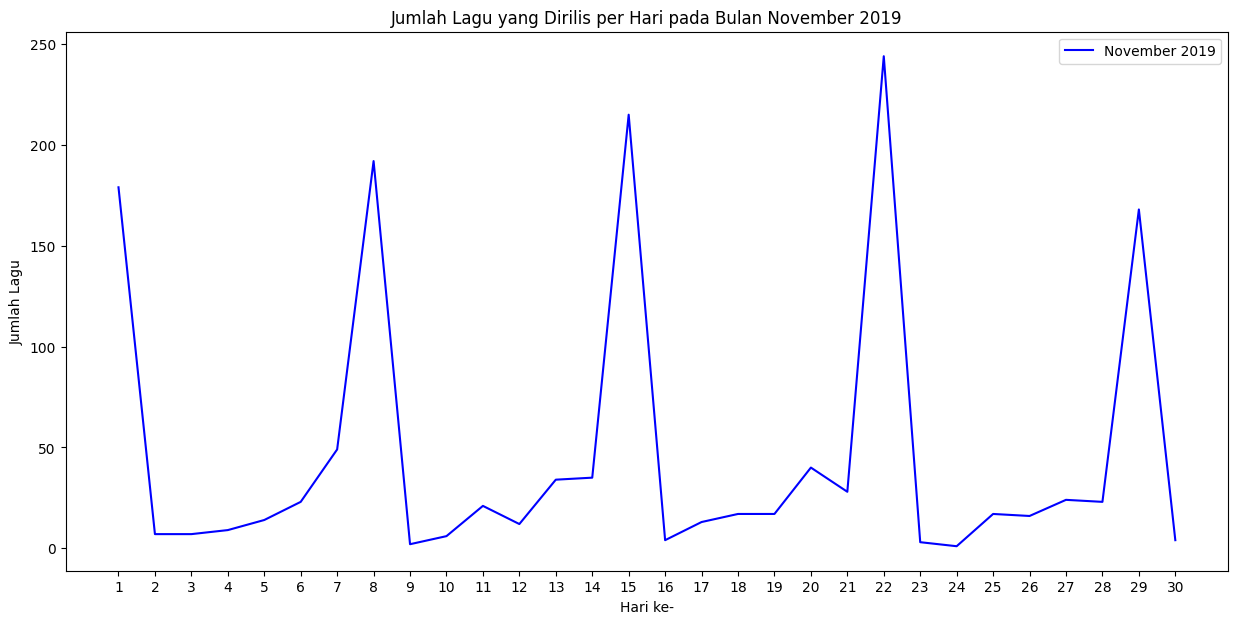

In [46]:
dataz=data[data["track_album_release_date"].str.contains("2019-11")]
dz=pd.DataFrame({
    "day": dataz["track_album_release_date"].str.slice(8,10).astype(int),
    "name": dataz["track_name"]
}).groupby("day").size().plot(kind="line", figsize=(15,7), color='blue', legend=True, label='November 2019')
plt.title('Jumlah Lagu yang Dirilis per Hari pada Bulan November 2019')
plt.xlabel('Hari ke-')
plt.ylabel('Jumlah Lagu')
plt.xticks(range(1,31))
plt.show()

### **Danceability by Mode**

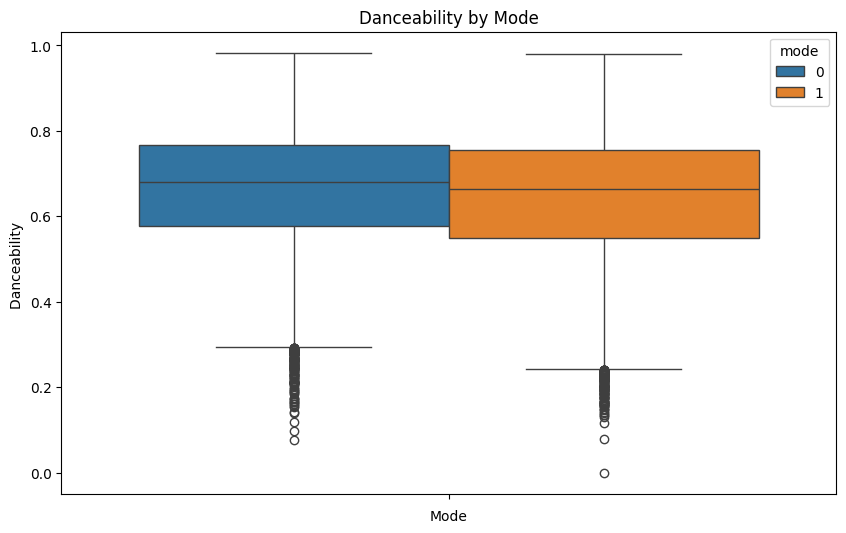

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(hue='mode', y='danceability', data=data)
plt.title('Danceability by Mode')
plt.xlabel('Mode')
plt.ylabel('Danceability ')
plt.show()

### **Treeplot Popularitas dengan Genre**

In [48]:
datak={}
datak['Popularity_Range']=[]
datak['Counts']=[]
datak['Genre']=[]
rate=[i for i in range(0,101,10)]
genre=['rap','edm','rock','latin','r&b','pop']
k=0 #k=0
for m in genre:
    for i in rate:
        j=len(data[(data["track_popularity"]<=int(i))&(data["playlist_genre"]==m)])
        datak['Popularity_Range'].append(i)
        datak['Counts'].append(j-k) #j dikurang j sebelumnya
        datak['Genre'].append(m)
        k=j #k menjadi j sebelumnya
    k=0 #reset counter k  
datao=pd.DataFrame(datak)

In [51]:
fig=px.treemap(datao,path=['Genre','Popularity_Range'],values='Counts')
fig.show()

## **5. Korelasi**

### **Heatmap Korelasi Semua Variabel Angka**

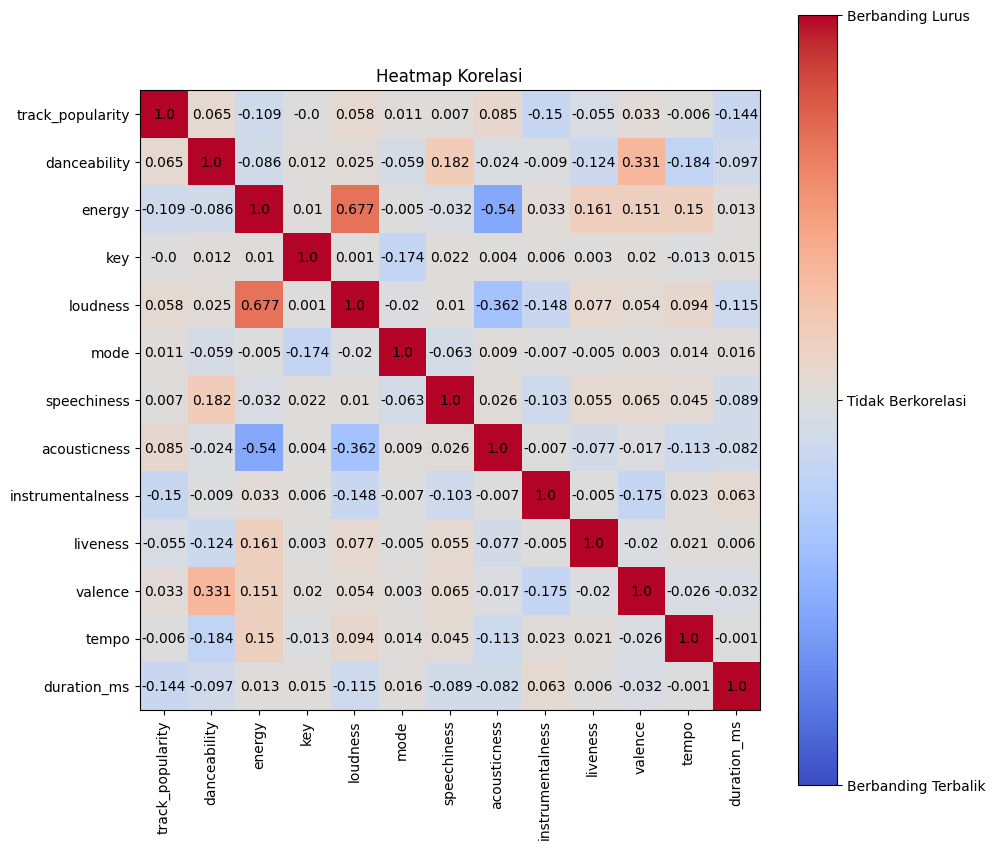

In [52]:
korelasi=data.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(10,10))
plt.imshow(korelasi,cmap='coolwarm',vmin=-1,vmax=1)
for i in range(len(korelasi)):
    for j in range(len(korelasi)):
        plt.annotate(str(round(korelasi.values[i][j], 3)),\
                     xy=(j+0.01, i+0.01),
                     ha='center', va='center', color='black')
plt.colorbar(ticks=[-1,0,1]).ax.set_yticklabels(['Berbanding Terbalik','Tidak Berkorelasi','Berbanding Lurus'])
plt.title('Heatmap Korelasi')
plt.xticks(range(len(korelasi.columns)),\
           korelasi.columns, rotation=90)
plt.yticks(range(len(korelasi.columns)),
           korelasi.columns)
plt.show()